# CS 3402: Introduction to Data Science
# Homework 3: Implementing Core Machine Learning Algorithms

**Due Date:** [11/07/2025]

---

### Instructions

This homework is designed to test your hands-on understanding of the algorithms we discussed in **Lectures 12, 13, and 14**. You will not be building models using one-line `sklearn` commands. Instead, you will be implementing the "guts" of these algorithms yourself.

**Academic Integrity:** All code written in the `### YOUR CODE HERE ###` blocks must be your own. While you may consult lecture notes and textbooks, you may not copy code from classmates or online sources. 

**How to submit:**
1.  Rename this file to **`HW3-[YourName].ipynb`** (e.g., `Hw3-JaneDoe.ipynb`).
2.  Complete the code in the sections marked `### YOUR CODE HERE ###`.
3.  Answer all the short-answer questions (labeled **"Question:"**) in the designated Markdown cells.
4.  Submit your completed `.ipynb` file to Canvas.

## Problem 1: Generalized Gradient Descent from Scratch (Based on Lecture 12) [25 Points]

In this problem, you will implement a **general** batch Gradient Descent algorithm to find the optimal parameters $\theta$ for a multiple linear regression model. This will be re-used in Problem 2.

The hypothesis is $h_\theta(x) = \theta^T X_b = \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n$ (where $x_0 = 1$).
The cost function is $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$.

The **vectorized gradient** (which works for *any* number of features) is:
$\text{gradients} = \frac{1}{m} X_b^T \cdot (X_b \cdot \theta - y)$

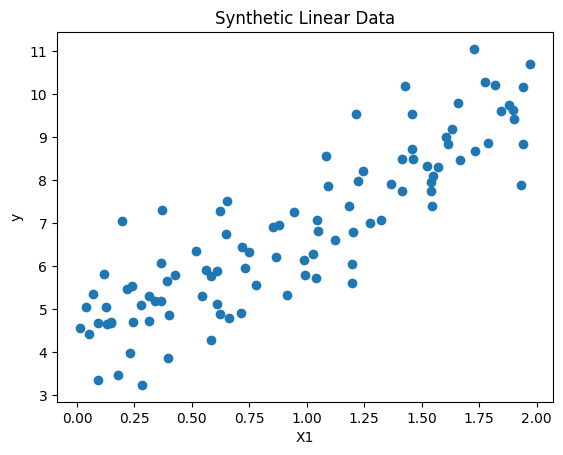

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data Generation ---
# We will create a simple linear dataset to work with
np.random.seed(42) # for reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
m = len(y) # number of training examples

# Add x0 = 1 to each instance (the bias term)
X_b = np.c_[np.ones((m, 1)), X]

# --- Plot the Data ---
plt.scatter(X, y)
plt.title("Synthetic Linear Data")
plt.xlabel("X1")
plt.ylabel("y")
plt.show()

In [96]:
def compute_cost(X_b, y, theta):
    """
    Computes the cost for linear regression (Mean Squared Error).
    """
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

### Your Task (Part 1.1) [15 Points]

Complete the `gradient_descent` function below. You must implement the main loop and the parameter update rule. Recall the partial derivatives:

$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}$

$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)}$

...

$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$

**Vectorized form:**
$
\text{gradients} = \frac{1}{m} X_b^T \cdot (X_b \cdot \theta - y)
$

In [97]:
def gradient_descent(X_b, y, learning_rate, num_iters):
    """
    Performs batch gradient descent to learn theta.
    
    Args:
        X_b (np.array): The input data with bias term (m x (n+1)).
        y (np.array): The target labels (m x 1).
        learning_rate (float): The learning rate (alpha).
        num_iters (int): The number of iterations to run.
        
    Returns:
        theta (np.array): The final learned parameters ((n+1) x 1).
        cost_history (list): A list of cost values at each iteration.
    """
    m = len(y)
    n_features = X_b.shape[1] # Number of features (including bias term)
    cost_history = []
    
    # Random initialization of theta, with shape (n_features, 1)
    theta = np.random.randn(n_features, 1)  

    for i in range(num_iters):
        ### YOUR CODE HERE ###

        # 1. Calculate the gradients (use the vectorized form provided above)
        h_x = X_b @ theta  
        error = h_x - y   
       
        # 2. Update theta (simultaneous update)
        gradient = (1 / m) * (X_b.T @ error)
        theta = theta - learning_rate * gradient
        
        # 3. Compute and store the cost for this iteration
        cost = (1 / (2 * m)) * float((error ** 2).sum())
        cost_history.append(cost)

        ### END YOUR CODE ###
        
    return theta, cost_history

### Your Task (Part 1.2)

Run the code block below to execute your `gradient_descent` function and visualize the results. You don't need to write any code here, but you will use the plots to answer Question 1.

Final Theta (theta_0, theta_1): [4.0814409  2.88812371]
Final Cost: 0.40599904644095375


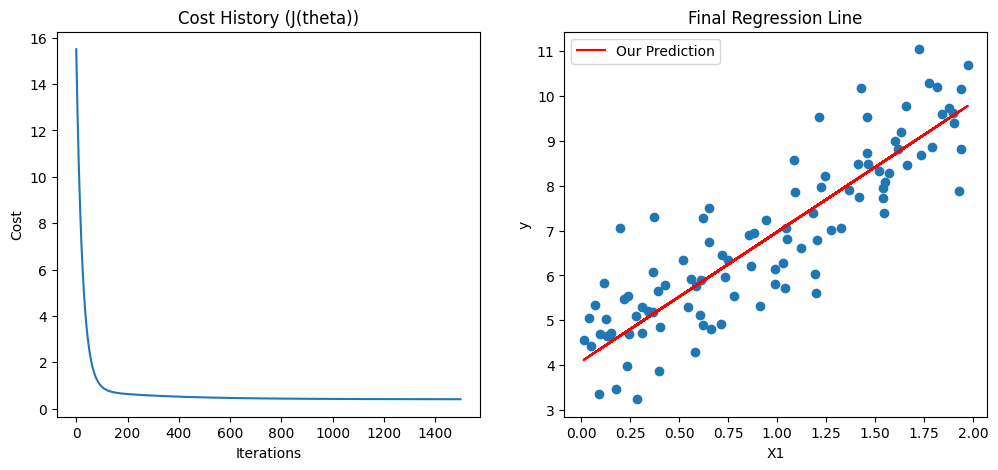

In [98]:
# --- Parameters ---
learning_rate = 0.01
num_iters = 1500

# --- Run Gradient Descent ---
theta_final, cost_history = gradient_descent(X_b, y, learning_rate, num_iters)

print(f"Final Theta (theta_0, theta_1): {theta_final.ravel()}")
print(f"Final Cost: {cost_history[-1]}")

# --- Plot Cost History ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_iters), cost_history)
plt.title("Cost History (J(theta))")
plt.xlabel("Iterations")
plt.ylabel("Cost")

# --- Plot Final Regression Line ---
plt.subplot(1, 2, 2)
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_final), 'r-', label="Our Prediction")
plt.title("Final Regression Line")
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

### Question 1: [10 Points]

a) What are the final values for $\theta_0$ and $\theta_1$?

b) Look at the cost history plot. What would happen if you set the learning rate $\alpha$ to a very large value (e.g., 1.0)? Why?

--- 
**Your Answer:**

a) The final value for $\theta_0$ is 4.195 and for $\theta_1$ is 2.788.

b) According to the cost history plot, if the learning rate is set to a very large value, it will cause the gradient descent algorithm to overshoot the minimium and possibly diverge, as the model will take too large of steps when attempting to find the minimium value.

---

---

## Problem 2: Polynomial Regression & Model Complexity (Based on Lecture 13) [35 Points]

In this problem, you will explore the bias-variance tradeoff by fitting polynomial regression models of different degrees. You will use a **validation set** to find the "best" model complexity (degree $d$).

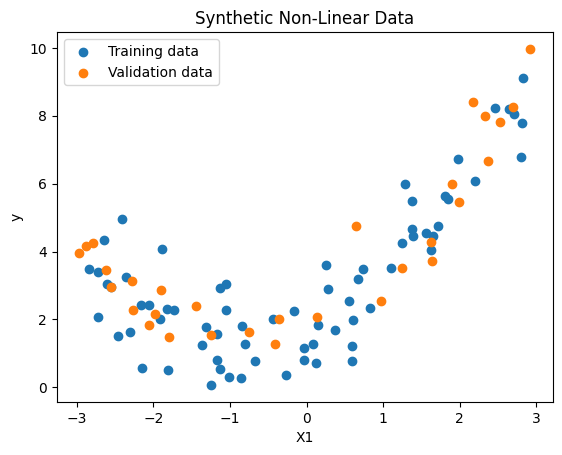

In [99]:
from sklearn.model_selection import train_test_split

# --- Data Generation ---
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# --- Split Data ---
# We MUST use a validation set to check for overfitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Plot the Data ---
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_val, y_val, label="Validation data")
plt.title("Synthetic Non-Linear Data")
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

### Your Task (Part 2.1) [25 Points]

Complete the code inside the `for` loop below. You must:
1.  Create the polynomial features for the **training data**.
2.  Fit a Linear Regression model to the transformed training data.
3.  Calculate the Mean Squared Error (MSE) on the **training set**.
4.  Transform the **validation data** using the same pipelines.
5.  Calculate the Mean SquaredError (MSE) on the **validation set**.


### Important: The Challenge of Re-using Gradient Descent

In this problem, you will use your `gradient_descent` function. However, polynomial features are a *major* challenge for gradient descent.

Imagine $d=10$. You will have a feature $x$ (values 0-6) and a feature $x^{10}$ (values up to $6^{10} \approx 60,000,000$). The scales are wildly different. This will make gradient descent fail to converge.

**You must implement feature scaling.** The full pipeline for each degree `d` will be:
1.  **PolynomialFeatures:** Create features $x, x^2, ..., x^d$.
2.  **StandardScaler:** Scale the features (compute $\mu, \sigma$ on the training set, then transform both train and validation sets).
3.  **Add Bias Term:** Manually add the $x_0=1$ column to your scaled data.
4.  **Gradient Descent:** Call your `gradient_descent` function on this final data.

In [100]:
train_errors = []
val_errors = []
degrees = range(1, 30)

# --- Hyperparameters for your Gradient Descent ---
# These may need tuning!
poly_learning_rate = 0.01
poly_num_iters = 2000

for d in degrees:
    ### YOUR CODE HERE ###
    
    # 1. Create polynomial features

    Polynomial_X_train = X_train.copy()
    for i in range(2, d + 1):
        Polynomial_X_train = np.c_[Polynomial_X_train, X_train**i]
    
    # 2. Normalize the features

    mu = np.mean(Polynomial_X_train, axis=0)
    sigma = np.std(Polynomial_X_train, axis=0)
    sigma[sigma == 0] = 1
    X_train_Normalize = (Polynomial_X_train - mu) / sigma
    
    # 3. Add the bias term (x0=1)

    bias = np.ones((X_train_Normalize.shape[0], 1))
    X_train_final = np.hstack([bias, X_train_Normalize])
    
    # 4. Run your gradient_descent function

    theta, _ = gradient_descent(X_train_final, y_train, poly_learning_rate, poly_num_iters)


    # 5. Get predictions and calculate error on the TRAINING set, store the training MSE in train_errors

    y_train_predictions = X_train_final.dot(theta)
    training_mse = np.mean((y_train_predictions - y_train)**2)
    train_errors.append(training_mse)
    
    # 6. Process the VALIDATION set (i.e., 1. create polynomial features, 2. scale, 3. add bias term, to the VALIDATION set)

    X_val_polynomial = X_val.copy()
    for i in range(2, d + 1):
        X_val_polynomial = np.c_[X_val_polynomial, X_val**i]

    X_val_Normalize = (X_val_polynomial - mu) / sigma

    X_val_final = np.c_[np.ones((X_val_Normalize.shape[0], 1)), X_val_Normalize]
  
    
    # 8. Get predictions and calculate error on the VALIDATION set, store the validation MSE in val_errors

    y_predictions = X_val_final.dot(theta)
    val_mse = np.mean((y_predictions - y_val)**2)
    val_errors.append(val_mse)
 
    
    ### END YOUR CODE ###

print("Done.")

Done.


### Your Task (Part 2.2)

Run the code block below to visualize the Error-Complexity plot. Use this plot to answer Question 2.

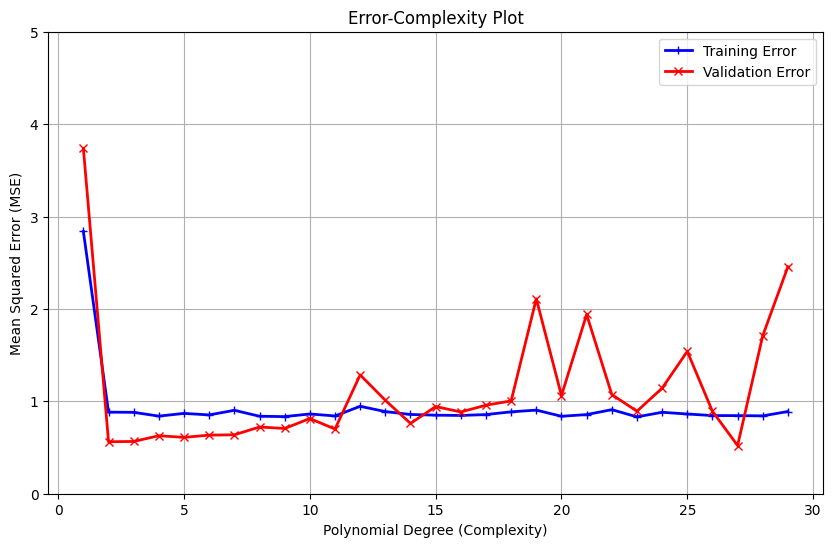

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'b-+', linewidth=2, label="Training Error")
plt.plot(degrees, val_errors, 'r-x', linewidth=2, label="Validation Error")
plt.title("Error-Complexity Plot")
plt.xlabel("Polynomial Degree (Complexity)")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.ylim(0, 5) # Set y-limit for better visualization
plt.grid(True)
plt.show()

### Question 2: [10 Points]

a) Based on your plot, what polynomial degree $d$ would you choose as the best model? **Explain your choice** by referencing the training and validation errors.

b) What phenomenon are you observing at low degrees (e.g., $d=1$)?

c) What phenomenon are you observing at high degrees (e.g., $d=20$)?

--- 
**Your Answer:**

a) The polynomial degrees I would choose as the best model are from 4-9, as they have low MSE for both training and validation error consistently, along with capturing patterns while avoiding noise, within the range.

b) At the low degrees, you would observe underfitting, as there is high training and validation error and the model is not capturing patterns of the data.

c) At high degrees, you are observing overfitting, as there is low and consistent training error, showing it has learned the training error ery well, but there are high validation errors that are inconsistent, showing that it has learned the noise and issues of the training set too well.

---

---

## Problem 3: Decision Tree - Information Gain & Optimal Split (Based on Lecture 14) [40 Points]

In this problem, you will implement the core logic for a single step in the decision tree algorithm: finding the best split for a continuous feature. You will use the **Information Gain** (IG) criterion.

We will use the Iris dataset, but simplified: only 2 features and 2 classes.

Data shape (X): (100, 2)
Label shape (y): (100,)


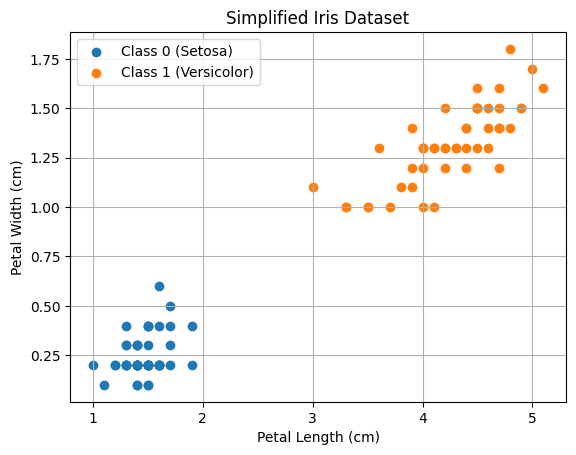

In [102]:
from sklearn.datasets import load_iris

# --- Load and Prepare Data ---
iris = load_iris()
# We'll use only two features: petal length (index 2) and petal width (index 3)
X = iris.data[:, 2:] 
y = iris.target

# We'll simplify to a binary classification problem: class 0 (Setosa) vs. class 1 (Versicolor)
# This removes class 2 (Virginica)
X = X[y != 2]
y = y[y != 2]

print(f"Data shape (X): {X.shape}")
print(f"Label shape (y): {y.shape}")

# --- Plot the Data ---
plt.scatter(X[y==0, 0], X[y==0, 1], label="Class 0 (Setosa)")
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1 (Versicolor)")
plt.title("Simplified Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

In [103]:
def calculate_entropy(y):
    """
    Calculates the Shannon entropy for a set of labels.
    H(S) = - sum(p_i * log2(p_i))
    """
    if len(y) == 0:
        return 0
        
    # Get the counts of each unique class in y
    counts = np.bincount(y)
    # Calculate the probabilities for each class
    probabilities = counts / len(y)
    
    # Calculate entropy
    entropy = 0
    for p in probabilities:
        if p > 0:
            entropy += p * np.log2(p)
            
    return -entropy

### Your Task (Part 3.1) [15 Points]

Complete the `calculate_information_gain` function. Recall the formula:

$IG(D, A) = H(Y) - H(Y|A) = H(Y) - \sum_{a \in A} p(a) H(Y|a)$

For our binary split, this simplifies to:

$IG = H(\text{parent}) - \left( \frac{N_{\text{left}}}{N_{\text{parent}}} H(y_{\text{left}}) + \frac{N_{\text{right}}}{N_{\text{parent}}} H(y_{\text{right}}) \right)$

In [108]:
def calculate_information_gain(y_parent, y_left, y_right):
    """
    Calculates the Information Gain of a split.
    
    Args:
        y_parent (np.array): Labels of the parent node.
        y_left (np.array): Labels of the left child node.
        y_right (np.array): Labels of the right child node.
        
    Returns:
        ig (float): The Information Gain.
    """
    
    ### YOUR CODE HERE ###
    
    # 1. Get the entropy of the parent node
    
    parent_entropy = calculate_entropy(y_parent)

    # 2. Get the number of samples in each node

    n_parent = len(y_parent)
    n_left = len(y_left)
    n_right = len(y_right)
\
    
    # 3. Calculate the weighted average entropy of the children

    if n_parent == 0:
        return 0
    
    weighted_avg_child_entropy = (n_left / n_parent) * calculate_entropy(y_left) + (n_right / n_parent) * calculate_entropy(y_right)
    
    # 4. Calculate Information Gain

    ig = parent_entropy - weighted_avg_child_entropy
    
    
    ### END YOUR CODE ###
    
    return ig

### Your Task (Part 3.2) [20 Points]

Complete the `find_best_split` function. This function should iterate through all possible split values for a *single feature* and find the split that yields the **highest Information Gain**.

**Hint:** A good way to find potential splits is to use the midpoints between unique, sorted feature values.

In [113]:
def find_best_split(X, y, feature_index):
    """
    Finds the best split (threshold) for a single feature.
    
    Args:
        X (np.array): The input data (m x n_features).
        y (np.array): The labels (m,).
        feature_index (int): The index of the feature to test.
        
    Returns:
        best_split_value (float): The feature value to split on.
        best_ig (float): The Information Gain of that split.
    """
    
    best_ig = -1
    best_split_value = -1
    
    ### YOUR CODE HERE ###
    
    # 1. Get the column for the feature we are testing

    feature_values = X[:, feature_index]
    
    # 2. Find all unique values and create potential split points
    # (A common way is to use midpoints between sorted unique values)

    unique_values = np.unique(feature_values)

    potential_splits_pts = []
    for i in range(len(unique_values) - 1):
        midpoint = (unique_values[i] + unique_values[i + 1]) / 2
        potential_splits_pts.append(midpoint)
 

    # 3. Loop through all potential split values
    for split_value in potential_splits_pts:
        
        # 4. Split the data into left and right children

        left_indexes = feature_values <= split_value
        right_indexes = feature_values > split_value
        
        y_left = y[left_indexes]
        y_right = y[right_indexes]

        
        # 5. Calculate the Information Gain for this split

        ig = calculate_information_gain(y, y_left, y_right)
        
        # 6. Update the best split if this one is better

        if ig > best_ig:
            best_ig = ig
            best_split_value = split_value

            
    ### END YOUR CODE ###
            
    return best_split_value, best_ig

### Your Task (Part 3.3)

Run the code block below to find the best split for each feature. Use these results to answer Question 3.

In [115]:
# Find the best split for Feature 0 (Petal Length)
split_val_0, ig_0 = find_best_split(X, y, 0)
print(f"Feature 0 (Petal Length):")
print(f"  Best Split Value: {split_val_0}")
print(f"  Information Gain: {ig_0}")

# Find the best split for Feature 1 (Petal Width)
split_val_1, ig_1 = find_best_split(X, y, 1)
print(f"\nFeature 1 (Petal Width):")
print(f"  Best Split Value: {split_val_1}")
print(f"  Information Gain: {ig_1}")

Feature 0 (Petal Length):
  Best Split Value: 2.45
  Information Gain: 1.0

Feature 1 (Petal Width):
  Best Split Value: 0.8
  Information Gain: 1.0


### Question 3: [5 Points]

a) What is the best split value and what is its Information Gain for the **"petal length"** feature?

b) What is the best split value and what is its Information Gain for the **"petal width"** feature?

c) Based on your results for (a) and (b), which feature and split value would the decision tree algorithm choose for its **first split (the root node)**? Why?

--- 
**Your Answer:**

a) The best split value for petal length is 2.45. It has an information gain of 1.0.

b) The best split value for petal width is 0.8, with an information gain of 1.0.

c) The decision tree would normally choose the one with higher information gain; however, both features have the same information gain, so the algorithm would choose the feature that appears first, which is Petal Length.

---

## End of Homework 3